Largest eigenvalue: 1.5924883467789368
Smallest eigenvalue: -2.2814731887391497e-16


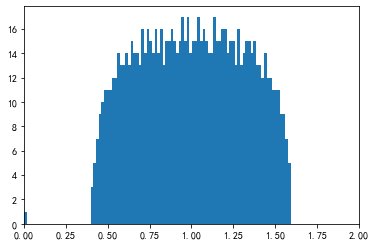

In [2]:
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt

n = 1000 # 1000 nodes
m = 5000 # 5000 edges
G = nx.gnm_random_graph(n,m)

L = nx.normalized_laplacian_matrix(G)
e = numpy.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e,bins=100) # histogram with 100 bins
plt.xlim(0,2)  # eigenvalues between 0 and 2
plt.show()

In [3]:
# needs mayavi2
# run with ipython -wthread
import networkx as nx
import numpy as np
from enthought.mayavi import mlab

# some graphs to try
#H=nx.krackhardt_kite_graph()
#H=nx.Graph();H.add_edge('a','b');H.add_edge('a','c');H.add_edge('a','d')
#H=nx.grid_2d_graph(4,5)
H=nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G=nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos=nx.spring_layout(G,dim=3)
# numpy array of x,y,z positions in sorted node order
xyz=np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars=np.array(G.nodes())+5

mlab.figure(1, bgcolor=(0, 0, 0))
mlab.clf()

pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                    scalars,
                    scale_factor=0.1,
                    scale_mode='none',
                    colormap='Blues',
                    resolution=20)

pts.mlab_source.dataset.lines = np.array(G.edges())
tube = mlab.pipeline.tube(pts, tube_radius=0.01)
mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

mlab.savefig('mayavi2_spring.png')
mlab.show() # interactive window

ModuleNotFoundError: No module named 'enthought'